<a href="https://colab.research.google.com/github/ibarne/ML_Practice/blob/master/Financial_Risk_Participants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
files.upload()

Saving Train.csv to Train.csv


{'Train.csv': b'City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk\n2,8.032,14,8,3,6,0,1\n31,77.73,8,3,3,8,1,0\n40,59.203,3,12,11,3,0,1\n12,73.08,4,5,7,6,0,0\n4,15.666,13,15,6,7,2,1\n1,6.237,10,10,12,3,1,1\n9,13.795,8,3,5,3,0,0\n23,74.132,11,15,5,8,0,1\n40,69.522,8,4,7,6,0,0\n38,6.577,8,5,7,3,1,0\n4,75.514,8,12,4,4,0,1\n0,34.522,11,10,14,3,1,1\n10,34.374,4,8,7,3,1,0\n8,22.872,8,8,7,7,0,1\n9,16.313,14,10,3,4,1,1\n11,16.396,13,15,8,6,0,1\n19,9.537,3,7,5,7,0,0\n9,16.433,12,11,15,3,1,1\n6,41.253,3,6,4,5,0,0\n2,22.067,7,3,8,5,1,1\n8,7.061,3,5,6,8,1,0\n23,38.318,7,7,6,3,1,0\n1,15.931,10,7,7,6,0,1\n6,8.875,7,7,7,4,1,1\n10,17.463,13,15,12,3,1,1\n37,7.087,11,3,4,5,1,1\n6,23.298,7,8,4,4,1,1\n2,70.261,3,6,5,3,0,0\n3,11.092,8,5,4,6,0,0\n40,14.226,8,5,6,4,1,1\n40,21.448,5,7,7,3,1,0\n5,73.111,10,8,4,8,0,1\n2,73.793,7,7,5,4,0,1\n31,9.606,11,4,4,4,1,1\n6,12.058,6,7,3,7,1,1\n41,17.908,6,3,7,6,1,0\n10,7.11,7,5,7,6,1,0\n40,73.507,8,5,5,7,1,1\n16,68

In [ ]:
train = pd.read_csv("Train.csv")
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [ ]:
train.shape

(543, 8)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [ ]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [ ]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


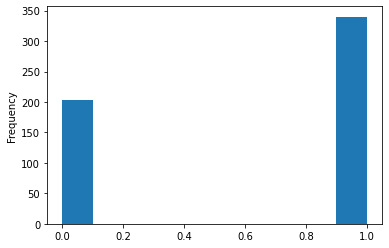

In [ ]:
train['IsUnderRisk'].astype('int').plot.hist()

In [ ]:
train.City.nunique()

43

In [ ]:
X = train.iloc[:,:-1]
Y = train.iloc[:,-1]

In [ ]:
X =pd.get_dummies(X,columns=["City"],drop_first=True)

In [ ]:
X.head()

,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13,City_14,City_15,City_16,City_17,City_18,City_19,City_20,City_21,City_22,City_23,City_24,City_25,City_26,City_27,City_28,City_29,City_30,City_31,City_32,City_33,City_35,City_37,City_38,City_39,City_40,City_41,City_42,City_43,City_44
0,8.032,14,8,3,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77.730,8,3,3,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,59.203,3,12,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,73.080,4,5,7,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15.666,13,15,6,7,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(543, 48)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
tree = DecisionTreeClassifier()
best_tree = GridSearchCV(tree,param_grid={'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],'criterion':['gini','entropy'],'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15]},n_jobs=-1,cv=5)

In [ ]:
best_tree.fit(X=X,y=Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
best_tree.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=100)

In [ ]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=7, min_samples_leaf=5)

classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
Y_pred = classifier.predict(scaler.fit_transform(X_test))
Y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1])

In [ ]:
c = confusion_matrix(Y_test, Y_pred)
c

array([[40, 11],
       [13, 72]])

In [ ]:
accuracy_score(Y_test,Y_pred)

0.8235294117647058

In [ ]:
score = cross_val_score(estimator=classifier,X=X,y=Y,cv=5,n_jobs=-1)

In [ ]:
np.average(score)

0.8488277268093782

In [ ]:
boosted_tree = AdaBoostClassifier(base_estimator=classifier,n_estimators=50,random_state=100)

In [ ]:
score_ada = cross_val_score(estimator=boosted_tree,X=X,y=Y,cv=5,n_jobs=-1)

In [ ]:
np.average(score_ada)

0.8176520557254502

In [ ]:
bagged_tree = BaggingClassifier(base_estimator=classifier,n_estimators=100)

In [ ]:
score_bagging = cross_val_score(estimator=bagged_tree,X=X,y=Y,cv=5,n_jobs=-1)

In [ ]:
np.average(score_bagging)

0.86357458375807

In [ ]:
from google.colab import files
files.upload()

Saving Test.csv to Test.csv


{'Test.csv': b'City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results\n41,18.272,13,12,9,7,0\n17,64.799,6,10,7,4,1\n31,68.89,3,3,7,8,0\n3,16.492,15,10,7,4,1\n9,17.178,7,3,8,3,1\n30,64.151,5,8,5,8,0\n23,35.149,6,7,4,3,1\n31,63.258,5,6,3,5,0\n29,6.163,7,14,3,4,0\n5,62.562,10,14,5,3,0\n35,14.521,11,6,3,5,0\n4,64.968,4,7,3,4,1\n23,13.614,8,4,7,7,1\n37,7.754,6,7,4,5,0\n12,16.445,6,15,15,5,1\n37,69.472,5,3,3,6,1\n9,18.84,6,5,8,4,0\n37,31.485,8,3,7,8,1\n20,11.418,7,9,7,8,0\n10,20.22,13,14,12,6,1\n38,14.292,5,8,5,5,1\n22,8.949,6,4,5,8,1\n40,60.878,3,11,7,4,0\n37,71.927,5,7,8,4,1\n5,74.542,8,7,5,6,1\n9,21.54,8,15,10,4,1\n6,14.902,7,4,8,3,1\n41,12.679,10,15,11,3,1\n40,71.995,10,14,4,3,0\n41,70.479,3,6,3,3,1\n4,75.694,6,8,4,5,1\n26,15.29,15,8,8,4,1\n23,10.552,11,5,4,5,1\n23,9.689,12,10,13,3,2\n37,59.47,6,6,4,7,0\n23,67.137,5,7,7,6,0\n28,9.16,15,11,15,3,1\n37,10.364,5,5,7,3,1\n41,70.015,8,7,4,5,1\n37,76.166,6,3,5,6,1\n40,11.909,15,3,3,8,1\n9,11.532,4,4,6,6,

In [ ]:
test = pd.read_csv("Test.csv")

In [ ]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [ ]:
test = pd.get_dummies(test,drop_first=True,columns=['City'])

In [ ]:
test.head()

,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,City_1,City_2,City_3,City_4,City_5,City_6,City_8,City_9,City_10,City_11,City_12,City_13,City_17,City_18,City_19,City_20,City_21,City_22,City_23,City_26,City_27,City_28,City_29,City_30,City_31,City_34,City_35,City_36,City_37,City_38,City_39,City_40,City_41
0,18.272,13,12,9,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,64.799,6,10,7,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,68.890,3,3,7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,16.492,15,10,7,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.178,7,3,8,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape

(233, 39)

In [ ]:
X.shape

(543, 48)

In [ ]:
test['City1'] =0
test['City2'] =0
test['City3'] =0
test['City4'] =0
test['City5'] =0
test['City6'] =0
test['City7'] =0
test['City8'] =0
test['City9'] =0

In [ ]:
test = scaler.fit_transform(test)

In [ ]:
test

array([[-0.56975664,  1.62344258,  1.30065397, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.28156004, -0.58492677,  0.73207541, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.44434158, -1.53137077, -1.25794957, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.02638849, -0.26944543, -0.68937101, ...,  0.        ,
         0.        ,  0.        ],
       [-0.93085232,  1.62344258,  1.30065397, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.39225626, -0.58492677, -0.68937101, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
bagged_tree.fit(scaler.fit_transform(X),Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=5,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=100,
 

In [ ]:
bagged_tree.predict(test)

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
bagged_tree.predict_proba(test)

array([[0.        , 1.        ],
       [0.29883236, 0.70116764],
       [0.90774397, 0.09225603],
       [0.        , 1.        ],
       [0.35289884, 0.64710116],
       [0.75730545, 0.24269455],
       [0.9075969 , 0.0924031 ],
       [0.90314528, 0.09685472],
       [0.17226913, 0.82773087],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.9382218 , 0.0617782 ],
       [0.5689654 , 0.4310346 ],
       [0.6439013 , 0.3560987 ],
       [0.00333333, 0.99666667],
       [0.92344019, 0.07655981],
       [0.47979027, 0.52020973],
       [0.70048498, 0.29951502],
       [0.2226993 , 0.7773007 ],
       [0.        , 1.        ],
       [0.66498936, 0.33501064],
       [0.64617764, 0.35382236],
       [0.4038997 , 0.5961003 ],
       [0.93432886, 0.06567114],
       [0.82957427, 0.17042573],
       [0.        , 1.        ],
       [0.20002539, 0.79997461],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.94801144, 0.05198856],
       [0.

#Thank You
___________________________________________________________________
